<a href="https://colab.research.google.com/github/akuresonite/IE605_CP/blob/master/Algorithm_on_Video_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
try:
    %load_ext cudf.pandas
    import cudf as pd
except ModuleNotFound:
    !pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==24.2.* dask-cudf-cu12==24.2.* cuml-cu12==24.2.* \
    cugraph-cu12==24.2.* cuspatial-cu12==24.2.* cuproj-cu12==24.2.* \
    cuxfilter-cu12==24.2.* cucim-cu12==24.2.* pylibraft-cu12==24.2.* \
    raft-dask-cu12==24.2.*

    %load_ext cudf.pandas
    import cudf as pd

import cv2
import imageio
from IPython.display import Image
from timeit import default_timer as timer
from sklearn.preprocessing import StandardScaler

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


In [11]:
! curl -Lo Hopkins155WithVideosPart7.zip http://www.vision.jhu.edu/data/fetchdata.php?id=27 -v
! unzip -q -o Hopkins155WithVideosPart7.zip -d Hopkins155WithVideosPart7
! rm -rf /content/Hopkins155WithVideosPart7.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0*   Trying 128.220.140.30:80...
* Connected to www.vision.jhu.edu (128.220.140.30) port 80 (#0)
> GET /data/fetchdata.php?id=27 HTTP/1.1
> Host: www.vision.jhu.edu
> User-Agent: curl/7.81.0
> Accept: */*
> 
* Mark bundle as not supporting multiuse
< HTTP/1.1 200 OK
< Date: Fri, 29 Mar 2024 20:42:49 GMT
< Server: Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips
< Content-Length: 21309059
< Cache-control: private
< Content-Disposition: attachment; filename=Hopkins155WithVideosPart7.zip
< Content-Type: application/zip
< 
{ [14219 bytes data]
100 20.3M  100 20.3M    0     0  10.9M      0  0:00:01  0:00:01 --:--:-- 10.9M
* Connection #0 to host www.vision.jhu.edu left intact


In [12]:
video_path = r"/content/Hopkins155WithVideosPart7/cars5/cars5.avi"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")
    exit(0)
else:
    print("Video loaded")

Video loaded


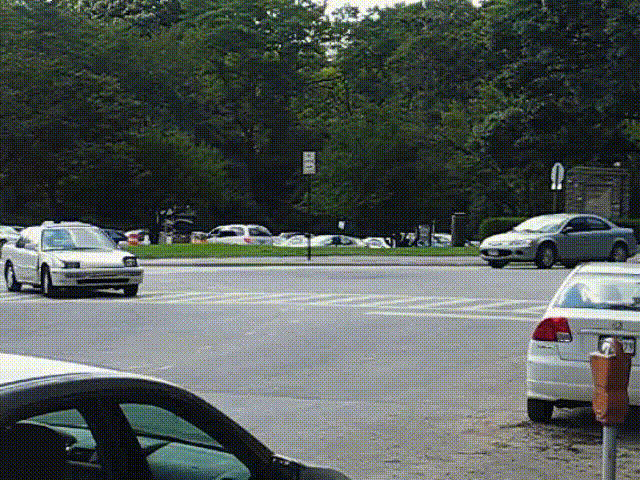

In [13]:
# Get the video writer
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, 37.0, (640, 480))

# Loop over the frames
while True:
    ret, frame = cap.read()
    if not ret:
        break

    out.write(frame) # Write the frame to the video writer

out.release() # Release the video writer

# Convert the video to a gif
!ffmpeg -i output.mp4 output.gif -y -v 2
Image("/content/output.gif", width=500)

Total number of frames: 37.0
Frame rate: 15.000150001500016
Width: 640.0 Height: 480.0


array([[[ 79,  95,  89],
        [ 84, 100,  94],
        [ 81,  99,  93],
        ...,
        [ 39,  60,  44],
        [ 24,  45,  29],
        [ 22,  43,  27]],

       [[ 70,  86,  80],
        [ 82,  98,  92],
        [ 95, 113, 107],
        ...,
        [ 40,  59,  43],
        [ 28,  49,  33],
        [ 19,  40,  24]],

       [[ 67,  85,  79],
        [ 92, 110, 104],
        [127, 148, 138],
        ...,
        [ 44,  63,  47],
        [ 39,  58,  42],
        [ 28,  47,  31]],

       ...,

       [[ 16,  18,  18],
        [ 16,  18,  18],
        [ 15,  17,  17],
        ...,
        [111, 112, 114],
        [107, 108, 110],
        [105, 106, 108]],

       [[ 16,  18,  18],
        [ 16,  18,  18],
        [ 15,  17,  17],
        ...,
        [106, 107, 109],
        [105, 106, 108],
        [106, 107, 109]],

       [[ 16,  18,  18],
        [ 16,  18,  18],
        [ 15,  17,  17],
        ...,
        [109, 110, 112],
        [110, 111, 113],
        [111, 112, 114]]], dtype=uint8)
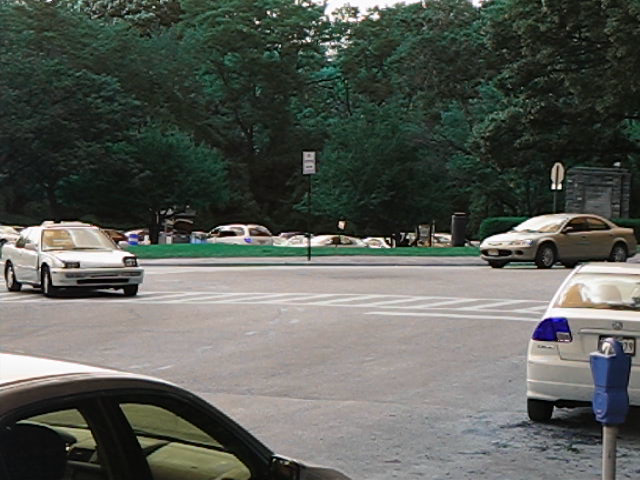

In [14]:
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

print("Total number of frames:", frame_count)
print("Frame rate:", fps)
print("Width:", width, "Height:", height)

ret, frame = cap.read()
frame

In [15]:
frames = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    else:
        frame_count += 1
        if frame_count == 1:
            print("Reading frames: ")
        print(f"{frame_count}", end=" ")

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame.flatten())

start_time = timer()
df = pd.DataFrame(frames)
end_time = timer()

print(f"\nExecuted the code in {end_time - start_time} seconds")

# df = pd.read_csv("cars5.csv")

total_memory = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f'Total memory usage of DataFrame (in MB): {total_memory}')
# df.to_csv("cars5.csv")
print(df.shape)
df.head()

Reading frames: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 
Executed the code in 57.75138042300023 seconds
Total memory usage of DataFrame (in MB): 10.546875
(36, 307200)


0       1       2       3       4       5       6       7       8       \
0      85      98      93     102      94      78     109     143     118   
1      84      82      86     103     127     147     119     102     112   
2      62      63      81     109     116      99      90      94      86   
3      86     149     119      92      88      83      83      84      90   
4      87     101      88     110     127     111     111     100     118   

   9       ...  307190  307191  307192  307193  307194  307195  307196  \
0     101  ...     123     116     118     116     112     110     113   
1     103  ...     117     116     113     110     109     112     114   
2      89  ...     107      99     101     104     106     110     116   
3     135  ...     106     104     102     108     116     123     126   
4     129  ...     134     133     129     125     120     118     120   

   307197  307198  307199  
0     117     115     111  
1     113     113     114  
2     122     125     124  
3     125     122     119  
4     124     129     131  

[5 rows x 307200 columns]

In [ ]:
scaler = StandardScaler()

df_std = pd.DataFrame(scaler.fit_transform(df.to_cupy()), columns=df.columns)
df.to_csv("cars5_std.csv")
df_std.head()

In [ ]:
import cupy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
try:
    import cvxpy as cp
except ModuleNotFound:
    ! pip -U install cvxpy -q
    import cvxpy as cp

In [ ]:
D = df_std;   print(f'>> D{D.shape}:\n')

# plotting the heatmap
plt.figure(figsize=(21,2))
sn.heatmap(data = D, cmap='Blues')

In [ ]:
T = np.eye(D.shape[1])
D = D @ T;                           print(f'>> D{D.shape}:\n')

plt.figure(figsize=(19,2))
sn.heatmap(data = D, cmap="Blues")

In [ ]:
# svd = TruncatedSVD(n_components=250);         # print('\n>> svd object:\n', svd)
# Q = svd.fit_transform(D);                     # print('\n>> Q:\n', Q)
# D_new = Q.T @ D;                               # print('\n>> D_new (Q.T @ D):\n', D_new, D_new.shape)

# # Normalizing l-2 norm (opti`onal based on requirement)
# # column_norms = np.linalg.norm(D_new, axis=0); #print('\n>> column_norms:\n', column_norms)
# # D_new = D_new/column_norms;                   #print('\n>> D_new:\n', D_new, D_new.shape)

# print(f'>> D_new{D_new.shape}')
# plt.figure(figsize=(19,6))
# sn.heatmap(data = D_new, cmap="Blues")
# plt.show()

# print(svd.singular_values_)
# plt.plot(svd.singular_values_)
# plt.show()

In [ ]:
import cvxpy as cp # ADMM solver

# Assuming D_new is your data matrix after preprocessing (2,3)
M1, M2 = D_new.shape;                                             #print('>> M1, M2:\n', D_new.shape)
# This should be the number of non-zero singular values
rd = M1;                                                          #print('\n>> rd:\n', M1)

# Variable to be solved for
C = cp.Variable((rd, M2));                                        #print('\n>> C:\n', C)

# Defining the constraints
constraints = [cp.diag(C.T @ D_new) == 1];                        #print('\n>> constraints:\n', constraints)

# Defining the objective function
objective = cp.Minimize(cp.norm(C.T @ D_new, p=1));                 #print('\n>> objective:\n', objective)

# Defining the problem
problem = cp.Problem(objective, constraints);                     #print('\n>> problem:\n', problem)

# Solving the problem using ADMM solver
# Solving the problem using SCS solver (which uses ADMM)
problem.solve(solver=cp.SCS, verbose=True)

In [ ]:
# print(f"optimal objective value: {objective.value}")
# C_star = C.value;     #print('\n>> C_star:\n', C.value)
# print('C_star shape:', C_star.shape)
# np.savetxt("c_star_svd250", C_star , delimiter=',')

In [ ]:
plt.figure(figsize=(19,2))
nrow = 1
for row in range(nrow):
    plt.subplot(nrow, 1, row+1)
    plt.plot(C_star[row,:])

In [ ]:
plt.figure(figsize=(19,2))
ncol = 1
for col in range(ncol):
    plt.subplot(ncol, 1, col+1)
    plt.plot(C_star[:,col])

In [ ]:
plt.figure(figsize=(19,2))
sn.heatmap(data = C_star, cmap="Blues")

In [ ]:
D_new.shape, C_star.shape

In [ ]:
x = 1 / np.linalg.norm(D_new.T @ C_star, axis=0, ord=1);  print(f'x {x.shape}:\n', x)
plt.figure(figsize=(19,2))
plt.plot(x)

In [ ]:
plt.figure(figsize=(9,7))
sn.heatmap(data = (C_star.T @ D_new), cmap="Blues")

In [ ]:
plt.figure(figsize=(19,4))

plt.subplot(1,3,1)
plt.stem(np.arange(0,250), np.hstack([(C_star.T @ D_new)[0,:50], np.zeros(200)]), linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{c^{*}D}$'); plt.title("d ins an outliers (B), p=1")
# plt.ylim(-0.5,1), plt.xlim(0,250)

plt.subplot(1,3,2)
plt.stem(np.arange(0,250), np.hstack([np.zeros(50), (C_star.T @ D_new)[0,50:]]), linefmt ='blue', markerfmt ='+')[0].set_markerfacecolor('none')
# plt.stem(np.arange(0,250), (C_star.T @ D_new)[0,:], linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{c^{*}D}$'); plt.title("d ins an inliers (A), p=1")
# plt.ylim(-1.5,1.5), plt.xlim(0,250)

plt.subplot(1,3,3)
plt.stem(np.arange(0,250), x, linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{X}$'); plt.title("Innovation Values, p=1")